<a href="https://colab.research.google.com/github/AndreyDyachkov/python-dataviz-machine-learning/blob/main/regression_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression-Evaluation

#### Palette

Source: https://coolors.co/

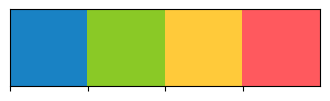

In [ ]:
import seaborn as sns
palette = ['#1982C4','#8AC926','#FFCA3A','#FF595E']
sns.palplot(palette)

## Import libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Import and cleaning data

https://www.kaggle.com/quantbruce/real-estate-price-prediction

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPB_PU_Ogul/data/Real estate.csv')
df0.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Copy the dataset and remove id column

In [ ]:
df = df0.copy()

In [ ]:
df = df.drop(['No'], axis=1)

Change column names: assign shorter names

In [ ]:
df.columns = ["transaction_date", "age", "mrt_distance", "num_conv_stores", "lat", "long", "price_unit_area"]
df.head()

,transaction_date,age,mrt_distance,num_conv_stores,lat,long,price_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Check for duplicates

In [ ]:
df.duplicated().sum()

0

Check data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  414 non-null    float64
 1   age               414 non-null    float64
 2   mrt_distance      414 non-null    float64
 3   num_conv_stores   414 non-null    int64  
 4   lat               414 non-null    float64
 5   long              414 non-null    float64
 6   price_unit_area   414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


Looks good

## EDA

In [ ]:
df.describe()

,transaction_date,age,mrt_distance,num_conv_stores,lat,long,price_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Scatter plot matrix

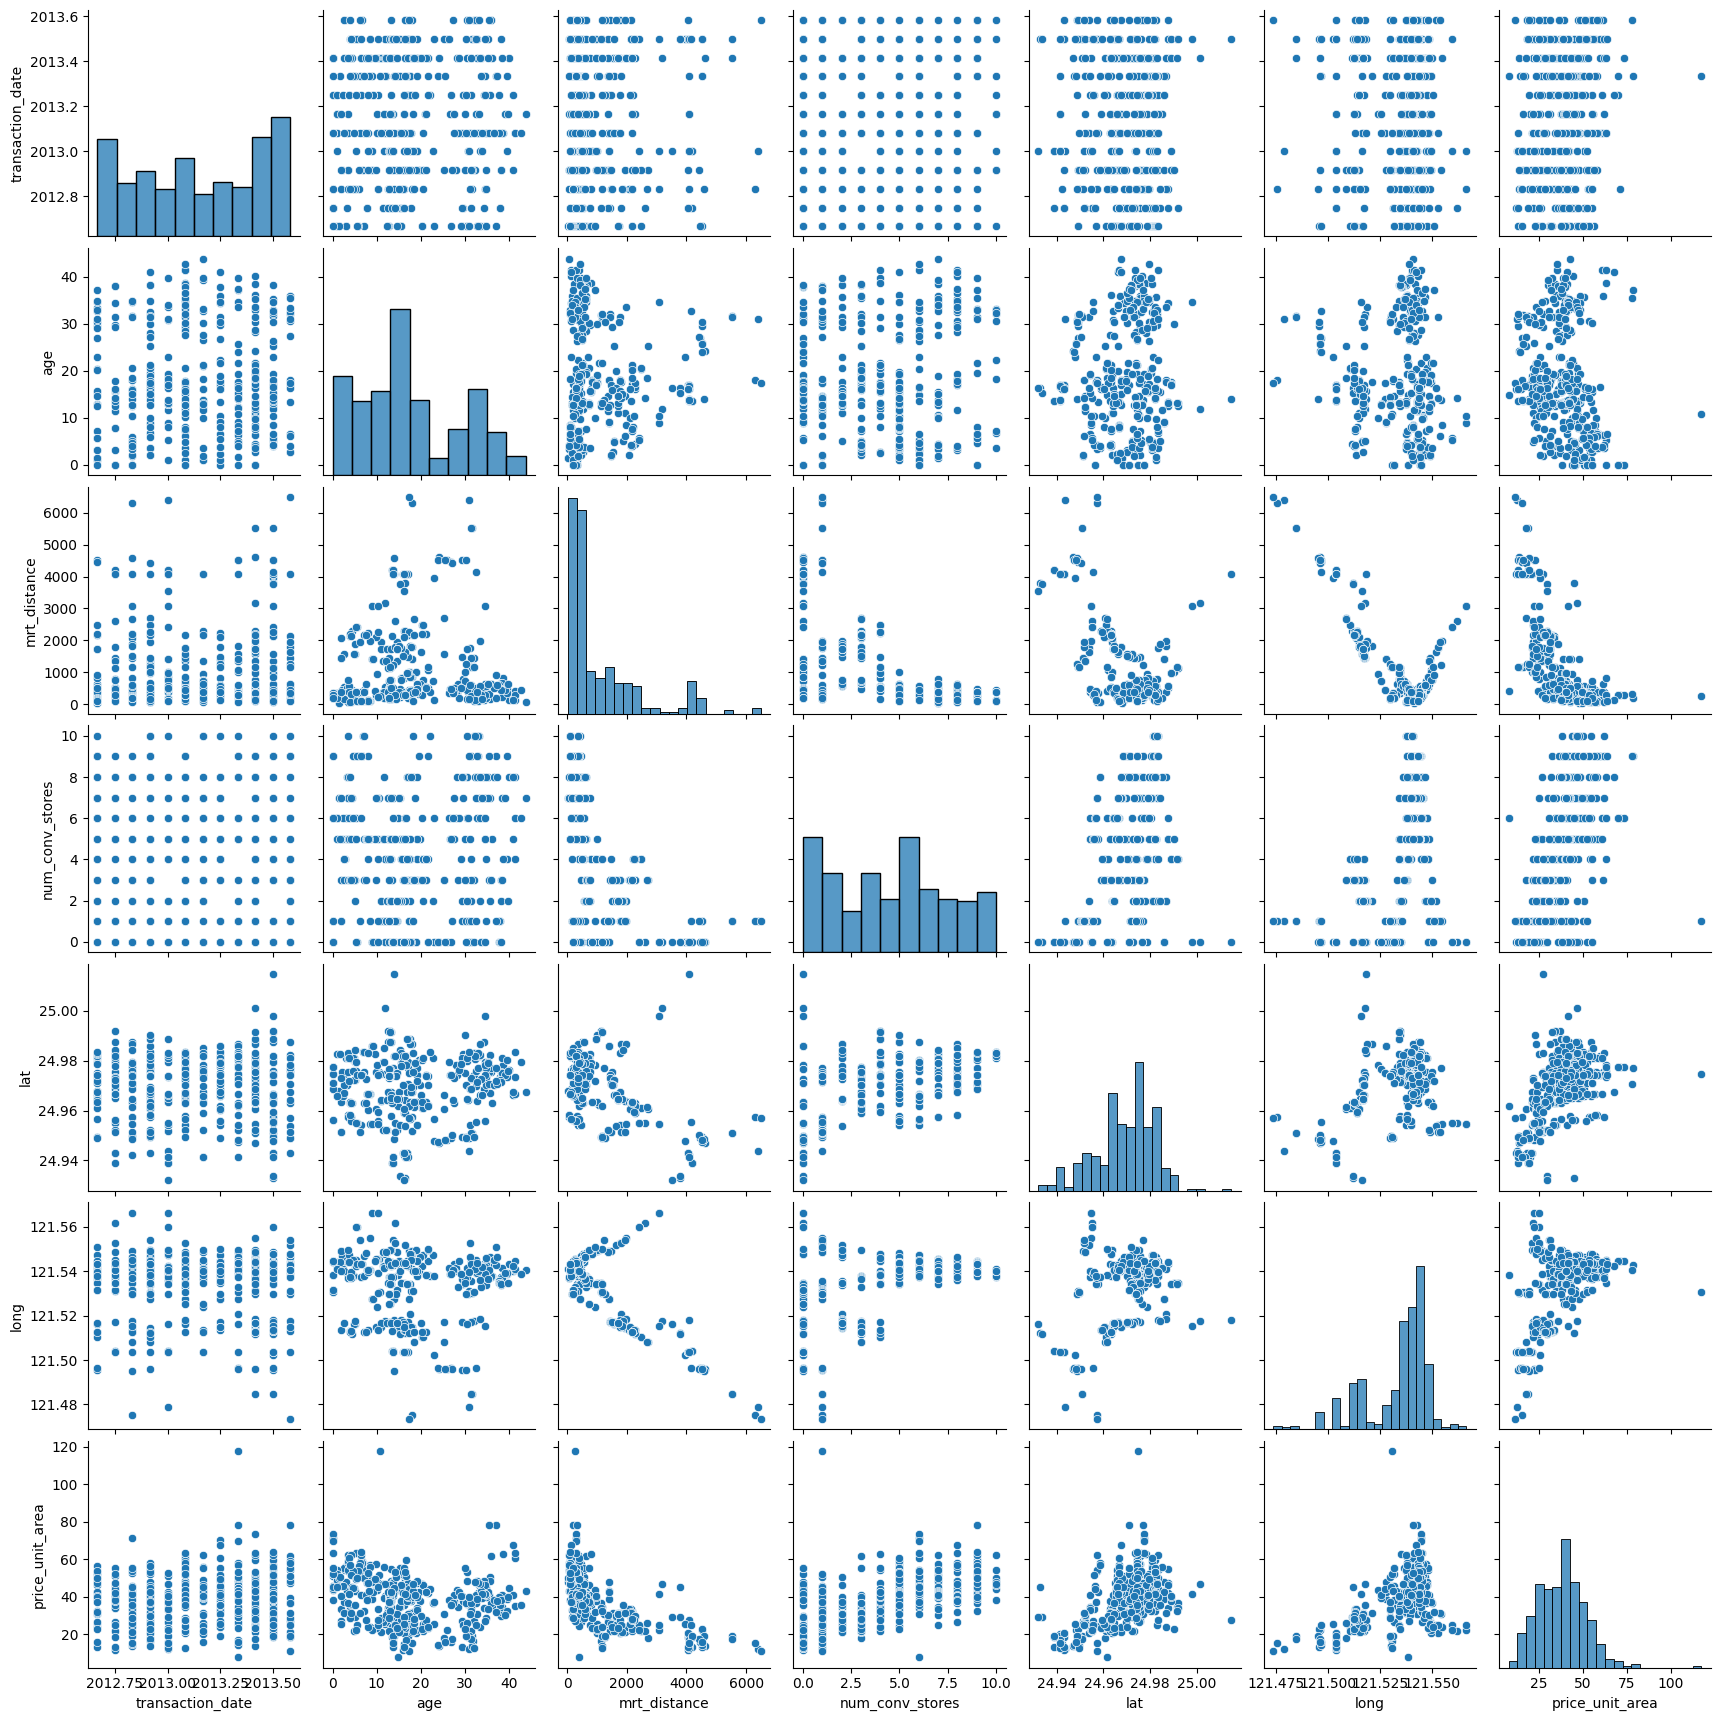

In [ ]:
sns.pairplot(df)
plt.show()

Conclusion:
- price gradually decreases with age  until 30, then the price goes up
- price is higher near MRT station (the dependence looks exponential)
- the more convenient stores nearby the higher the price
- the distribution of the price looks more or less normal

Correlation

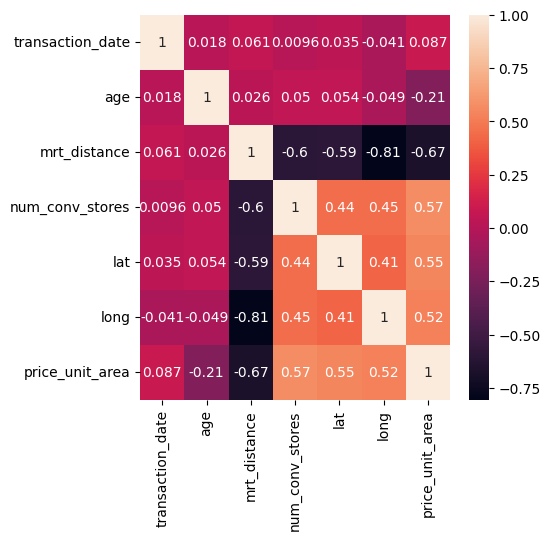

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(numeric_only=True),  annot=True)
plt.show()

Conclusion:
 MRT distance, number of store, lat and long are the best predictors


Let's check for outliers

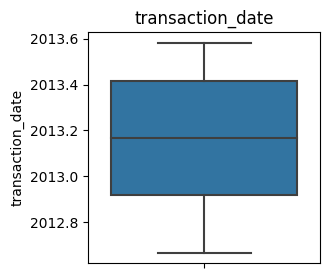

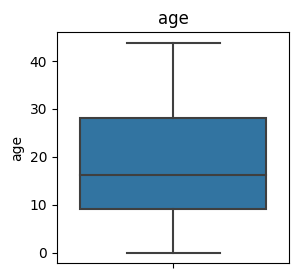

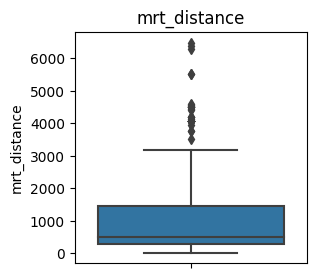

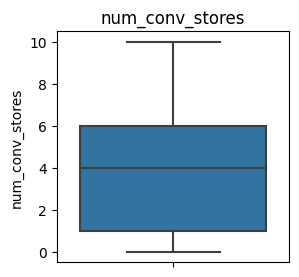

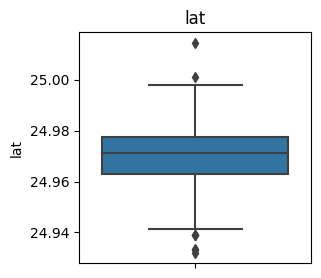

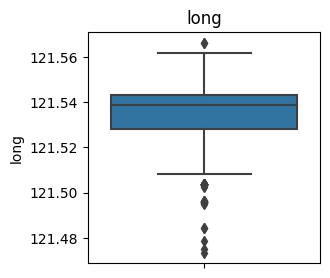

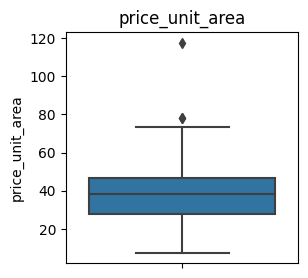

In [ ]:
for name in df.columns:
    plt.figure(figsize=(3, 3))
    plt.title(name)
    sns.boxplot(y=name, data=df)
    plt.show()

Let's remove only one extreme price value

In [ ]:
df = df[df['price_unit_area']<80]

In [ ]:
len(df)

413

## Feature engineering

### MRT distance (natural log)

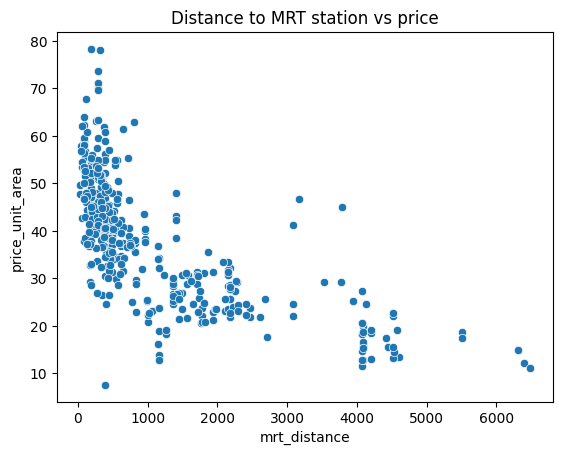

In [ ]:
sns.scatterplot(x=df["mrt_distance"], y=df["price_unit_area"])
plt.title("Distance to MRT station vs price")
plt.show()

The dependence looks nonlinear. Could be exponential, so let's try to calculate the natural log.

In [ ]:
df['log_mrt_dist'] = np.log(df['mrt_distance'])

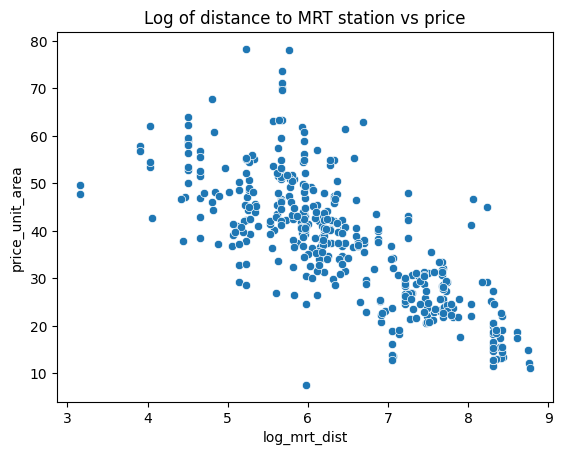

In [ ]:
sns.scatterplot(x=df["log_mrt_dist"], y=df["price_unit_area"])
plt.title("Log of distance to MRT station vs price")
plt.show()

Looks more linear. Let's drop mrt_distance column

In [ ]:
df = df.drop('mrt_distance', axis=1)

Reoder columns

In [ ]:
new_order = ['transaction_date', 'age', 'log_mrt_dist','num_conv_stores','lat','long','price_unit_area']
df = df[new_order]
df.head()

,transaction_date,age,log_mrt_dist,num_conv_stores,lat,long,price_unit_area
0,2012.917,32.0,4.441225,10,24.98298,121.54024,37.9
1,2012.917,19.5,5.725527,9,24.98034,121.53951,42.2
2,2013.583,13.3,6.331474,5,24.98746,121.54391,47.3
3,2013.500,13.3,6.331474,5,24.98746,121.54391,54.8
4,2012.833,5.0,5.967603,5,24.97937,121.54245,43.1


### Location: longitude and latitude (clustering)

There is an idea (not mine): houses close to each other tend to have very close price tag in real life. Let's check.

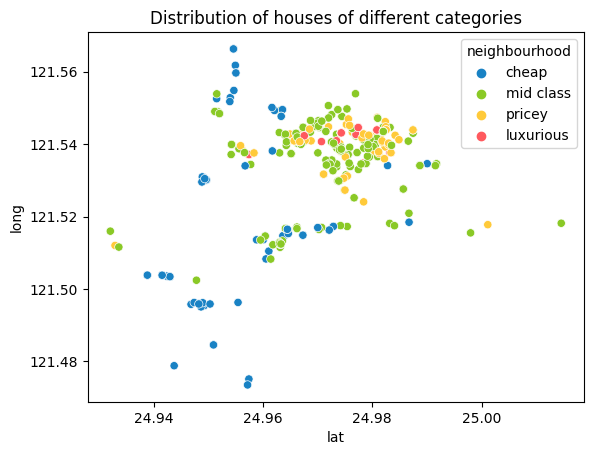

In [ ]:
labels = ["cheap", "mid class", "pricey", "luxurious"]
df["neighbourhood"] = pd.cut(df["price_unit_area"], bins=4, labels=labels)

sns.scatterplot(x="lat", y="long",
                hue="neighbourhood",
                data=df,
                palette=palette)
plt.title("Distribution of houses of different categories")
plt.show()

Location matters so let's create a few clusters

#### Latitude and longitude clastering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['lat', 'long']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


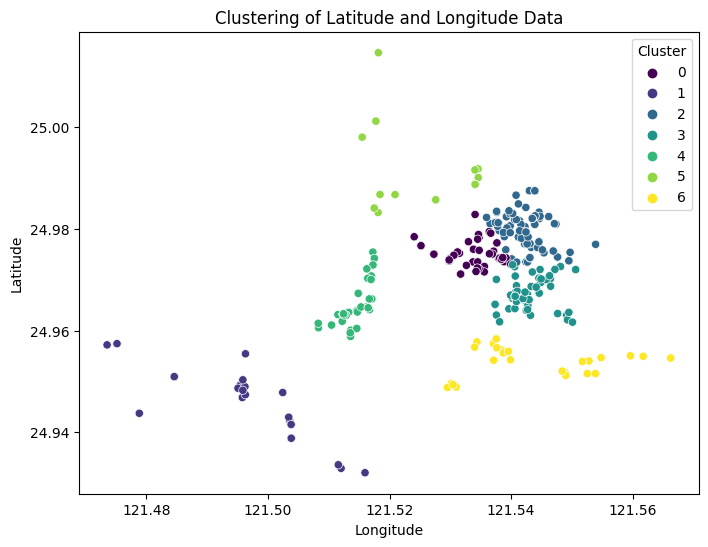

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='long', y='lat', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('Clustering of Latitude and Longitude Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Convert clusters into dummy variables
clusters_dummy = pd.get_dummies(df['Cluster'], prefix='Cluster', drop_first=True)
df = pd.concat([df, clusters_dummy], axis=1)
df.head()

,transaction_date,age,log_mrt_dist,num_conv_stores,lat,long,price_unit_area,neighbourhood,Cluster,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
0,2012.917,32.0,4.441225,10,24.98298,121.54024,37.9,mid class,2,0,1,0,0,0,0
1,2012.917,19.5,5.725527,9,24.98034,121.53951,42.2,mid class,2,0,1,0,0,0,0
2,2013.583,13.3,6.331474,5,24.98746,121.54391,47.3,pricey,2,0,1,0,0,0,0
3,2013.500,13.3,6.331474,5,24.98746,121.54391,54.8,pricey,2,0,1,0,0,0,0
4,2012.833,5.0,5.967603,5,24.97937,121.54245,43.1,pricey,2,0,1,0,0,0,0


In [ ]:
df = df.drop(['lat','long','Cluster'], axis=1)
df.head()

,transaction_date,age,log_mrt_dist,num_conv_stores,price_unit_area,neighbourhood,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
0,2012.917,32.0,4.441225,10,37.9,mid class,0,1,0,0,0,0
1,2012.917,19.5,5.725527,9,42.2,mid class,0,1,0,0,0,0
2,2013.583,13.3,6.331474,5,47.3,pricey,0,1,0,0,0,0
3,2013.500,13.3,6.331474,5,54.8,pricey,0,1,0,0,0,0
4,2012.833,5.0,5.967603,5,43.1,pricey,0,1,0,0,0,0


### Date (remove)

The price didn't change much over time. Furthermore, if we get test data out of this time length, it won't help us to estimate the price. Let's drop the column.

In [ ]:
df = df.drop(['transaction_date','neighbourhood'], axis=1)

In [ ]:
df_fixed = df.copy()

In [ ]:
df_fixed.head()

,age,log_mrt_dist,num_conv_stores,price_unit_area,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
0,32.0,4.441225,10,37.9,0,1,0,0,0,0
1,19.5,5.725527,9,42.2,0,1,0,0,0,0
2,13.3,6.331474,5,47.3,0,1,0,0,0,0
3,13.3,6.331474,5,54.8,0,1,0,0,0,0
4,5.0,5.967603,5,43.1,0,1,0,0,0,0


## Splitting the dataset into train and test data

In [ ]:
X = df_fixed.drop('price_unit_area', axis=1)
y = df_fixed['price_unit_area']

In [ ]:
print(X.shape, y.shape)

(413, 9) (413,)


### Split into X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(330, 9) (330,)
(83, 9) (83,)


## Scaling

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled).describe().round(2) # Convert back to DataFrame to apply describe()

,0,1,2,3,4,5,6,7,8
count,330.00,330.00,330.00,330.00,330.00,330.0,330.00,330.00,330.0
mean,0.40,0.57,0.43,0.08,0.30,0.2,0.13,0.04,0.1
std,0.26,0.20,0.29,0.27,0.46,0.4,0.34,0.20,0.3
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
25%,0.20,0.45,0.20,0.00,0.00,0.0,0.00,0.00,0.0
50%,0.36,0.54,0.50,0.00,0.00,0.0,0.00,0.00,0.0
75%,0.65,0.73,0.60,0.00,1.00,0.0,0.00,0.00,0.0
max,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0


## Regression

##### Which evaluation metric to choose?

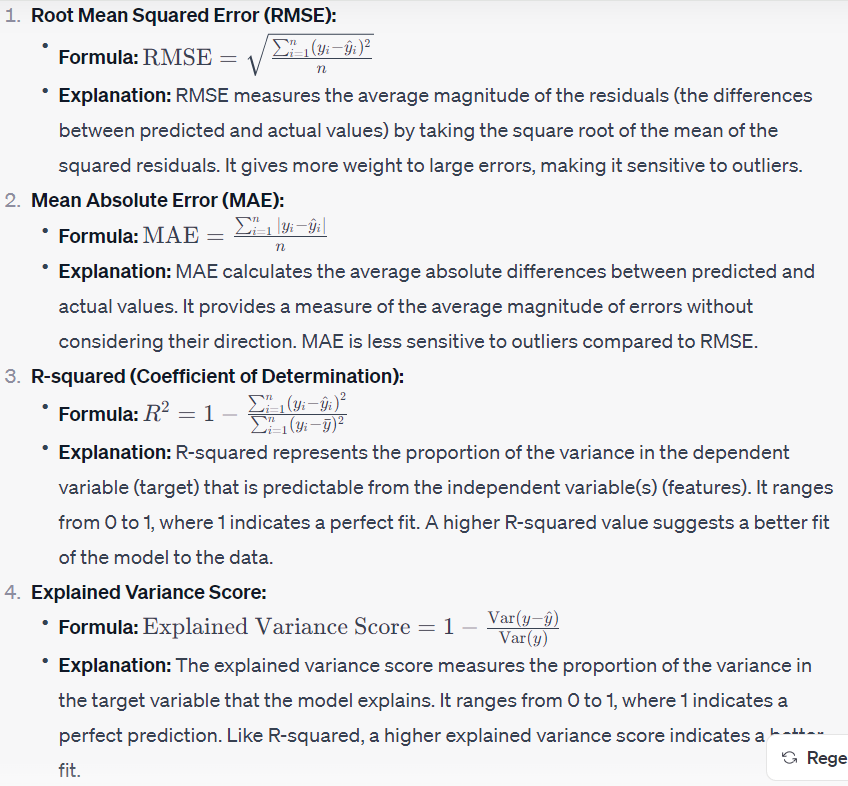

Metrics and scoring: quantifying the quality of predictions (classification and regression):
https://scikit-learn.org/stable/modules/model_evaluation.html

##### Function

Make a function to calculate evaluation metrics

In [ ]:
def evaluate(true, predicted):
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(true, predicted)
  r2 = r2_score(true, predicted)
  explained_var = explained_variance_score(true, predicted)
  print("Root Mean Squared Error (RMSE):", rmse.round(3))
  print("Mean Absolute Error (MAE):", mae.round(3))
  print("R-squared:", r2.round(3))
  print("Explained Variance Score:", explained_var.round(3))

#### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [ ]:
model = LinearRegression() # Create a linear regression model

In [ ]:
model.fit(X_train_scaled, y_train) # Train the model on the training set

LinearRegression()

In [ ]:
y_pred_scaled = model.predict(X_test_scaled) # Make predictions on the scaled test set

##### Evaluate the model

In [ ]:
print("Linear Regression Coefficients:", model.coef_.round(2))
print("Intercept:", model.intercept_.round(2))

Linear Regression Coefficients: [-10.5  -27.95   7.63  -9.48   1.75  -4.75  -8.6    1.11  -8.45]
Intercept: 58.43


In [ ]:
evaluate(y_test, y_pred_scaled)

Root Mean Squared Error (RMSE): 5.428
Mean Absolute Error (MAE): 4.291
R-squared: 0.819
Explained Variance Score: 0.822


##### Test vs train

In [ ]:
y_train_pred_scaled = model.predict(X_train_scaled)

In [ ]:
evaluate(y_train, y_train_pred_scaled)

Root Mean Squared Error (RMSE): 7.498
Mean Absolute Error (MAE): 5.229
R-squared: 0.669
Explained Variance Score: 0.669


##### Visualization

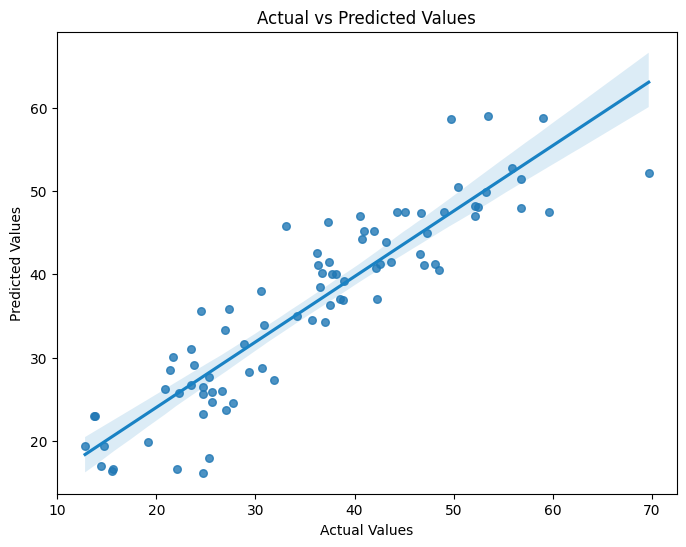

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x = y_test, y = y_pred_scaled, scatter_kws={'s': 30}, line_kws={'color': palette[0]})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42) # Create a Random Forest Regressor

In [ ]:
model.fit(X_train_scaled, y_train) # Train the model on the training set

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_scaled = model.predict(X_test_scaled) # Make predictions on the scaled test set

##### Evaluate the model

In [ ]:
evaluate(y_test, y_pred_scaled)

Root Mean Squared Error (RMSE): 5.121
Mean Absolute Error (MAE): 3.893
R-squared: 0.839
Explained Variance Score: 0.839


##### Test vs train

In [ ]:
y_train_pred_scaled = model.predict(X_train_scaled)

In [ ]:
evaluate(y_train, y_train_pred_scaled)

Root Mean Squared Error (RMSE): 2.822
Mean Absolute Error (MAE): 2.007
R-squared: 0.953
Explained Variance Score: 0.953


##### Visualization

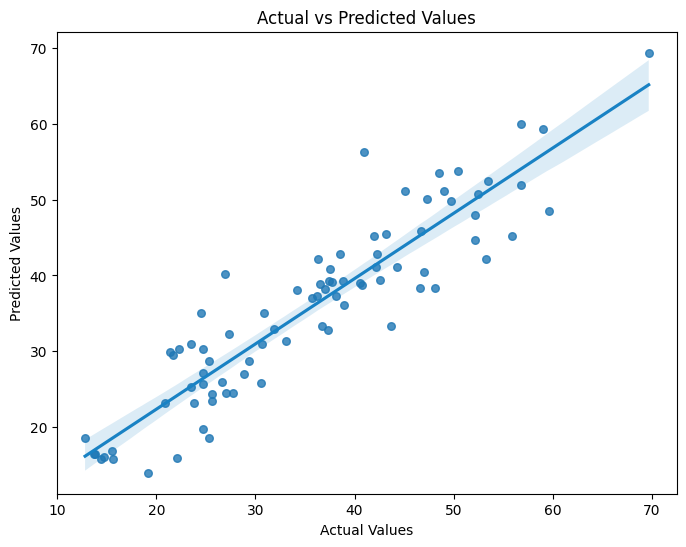

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x = y_test, y = y_pred_scaled, scatter_kws={'s': 30}, line_kws={'color': palette[0]})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42) # Create a Gradient Boosting Regressor

In [ ]:
model.fit(X_train_scaled, y_train) # Train the model on the training set

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred_scaled = model.predict(X_test_scaled) # Make predictions on the scaled test set

##### Evaluate the model

In [ ]:
evaluate(y_test, y_pred_scaled)

Root Mean Squared Error (RMSE): 5.453
Mean Absolute Error (MAE): 4.138
R-squared: 0.817
Explained Variance Score: 0.818


##### Test vs train

In [ ]:
y_train_pred_scaled = model.predict(X_train_scaled)

In [ ]:
evaluate(y_train, y_train_pred_scaled)

Root Mean Squared Error (RMSE): 3.866
Mean Absolute Error (MAE): 2.941
R-squared: 0.912
Explained Variance Score: 0.912


##### Visualization

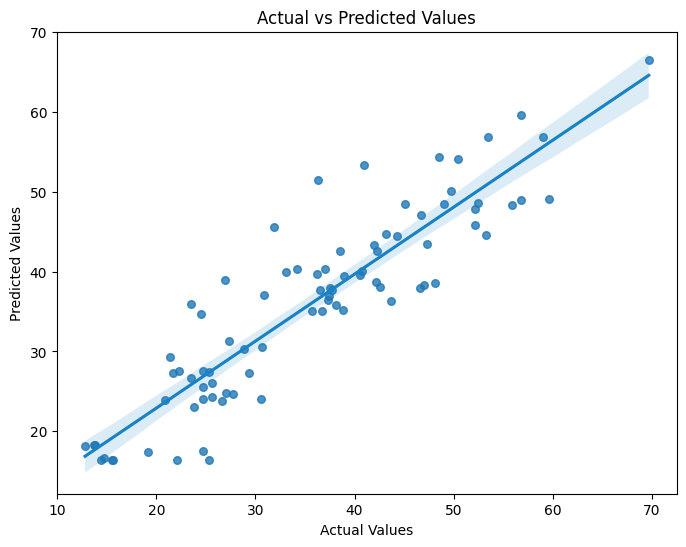

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x = y_test, y = y_pred_scaled, scatter_kws={'s': 30}, line_kws={'color': palette[0]})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='linear') # Create a Support Vector Regressor (SVR)

In [ ]:
model.fit(X_train_scaled, y_train) # Train the model on the training set

SVR(kernel='linear')

In [ ]:
y_pred_scaled = model.predict(X_test_scaled) # Make predictions on the scaled test set

##### Evaluate the model

In [ ]:
evaluate(y_test, y_pred_scaled)

Root Mean Squared Error (RMSE): 6.214
Mean Absolute Error (MAE): 4.92
R-squared: 0.762
Explained Variance Score: 0.763


##### Test vs train

In [ ]:
y_train_pred_scaled = model.predict(X_train_scaled)

In [ ]:
evaluate(y_train, y_train_pred_scaled)

Root Mean Squared Error (RMSE): 7.981
Mean Absolute Error (MAE): 5.603
R-squared: 0.626
Explained Variance Score: 0.634


##### Visualization

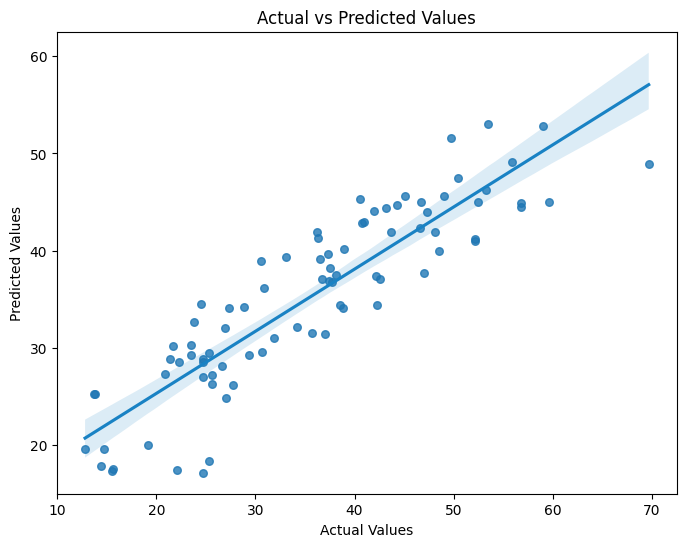

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x = y_test, y = y_pred_scaled, scatter_kws={'s': 30}, line_kws={'color': palette[0]})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()